In [8]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [9]:
# 데이터 불러오기
raw_path = './data/'
customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [10]:
# geolocation 제외 데이터 합치기
df_all = pd.DataFrame()
df_all = orders.merge(order_items, on='order_id', how='outer')
df_all = df_all.merge(order_payments, on='order_id', how='outer')
df_all = df_all.merge(order_reviews, on='order_id', how='outer')
df_all = df_all.merge(olist_sellers, on='seller_id', how='outer')
df_all = df_all.merge(olist_products, on='product_id', how='outer')
df_all = df_all.merge(customer, on='customer_id', how='outer')

In [11]:
# 카테고리 번역 데이터
trans_name = pd.read_csv(f"{raw_path}/product_category_name_translation.csv")

# df_all은 geolocation 제외 합친 데이터(product_category_name_translation 적용)
df_all = df_all.merge(trans_name)
print(df_all.shape)
df_all[["product_category_name", "product_category_name_english"]].sample(5)

(116576, 40)


,product_category_name,product_category_name_english
14935,esporte_lazer,sports_leisure
106343,market_place,market_place
36393,moveis_decoracao,furniture_decor
87661,cama_mesa_banho,bed_bath_table
18787,esporte_lazer,sports_leisure


# 지역 분석

## 매출 Top15 품목 중, 주문량 상위 10개 도시

In [12]:
# 매출 top15 품목
top15 = list(df_all.groupby("product_category_name_english").agg({"price":"sum"}).sort_values("price", ascending=False).index[:15])
print(len(top15))
top15

15


['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor',
 'housewares',
 'cool_stuff',
 'auto',
 'garden_tools',
 'toys',
 'baby',
 'perfumery',
 'telephony',
 'office_furniture']

In [13]:
# top15에 속하는 품목은 True else False
condition = df_all["product_category_name_english"].map(lambda x: True if x in top15 else False)
top15_df = df_all.loc[condition, :]
top15_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104528,0689012a897b2ac50b37994d77898bc8,c2676f47437c3ea66442e39a07605d77,processing,2017-03-08 10:44:37,2017-03-08 10:55:21,NaN,NaN,2017-04-05 00:00:00,1.0,a0265e3673ba47db572b54978126f6ae,...,1.0,15000.0,50.0,90.0,50.0,8ad37a8e909b633be54a0dc3e94c7a04,86600,rolandia,PR,office_furniture
104529,0689012a897b2ac50b37994d77898bc8,c2676f47437c3ea66442e39a07605d77,processing,2017-03-08 10:44:37,2017-03-08 10:55:21,NaN,NaN,2017-04-05 00:00:00,2.0,a0265e3673ba47db572b54978126f6ae,...,1.0,15000.0,50.0,90.0,50.0,8ad37a8e909b633be54a0dc3e94c7a04,86600,rolandia,PR,office_furniture
104530,0689012a897b2ac50b37994d77898bc8,c2676f47437c3ea66442e39a07605d77,processing,2017-03-08 10:44:37,2017-03-08 10:55:21,NaN,NaN,2017-04-05 00:00:00,3.0,a0265e3673ba47db572b54978126f6ae,...,1.0,15000.0,50.0,90.0,50.0,8ad37a8e909b633be54a0dc3e94c7a04,86600,rolandia,PR,office_furniture
104531,9c781d427857ca8dee49b22614eb9e39,4396492d7da56955ab6c0fc9c9fceaab,processing,2017-02-14 14:28:17,2017-02-14 14:35:24,NaN,NaN,2017-03-15 00:00:00,1.0,61d980017b9f55ac2451dbf0bdb849f2,...,1.0,50.0,35.0,90.0,45.0,a4585eb1763f581eae8562642424a638,88162,biguacu,SC,office_furniture


In [14]:
# 고객 도시 기준 주문 수량 그룹화
temp = top15_df.groupby("customer_city").agg({"order_id":"nunique"}).sort_values("order_id", ascending=False).head(10)
temp

,order_id
customer_city,
sao paulo,11922
rio de janeiro,5274
belo horizonte,2171
brasilia,1658
curitiba,1174
campinas,1106
porto alegre,1096
salvador,951
guarulhos,931


Text(0.5, 0, '주문량')

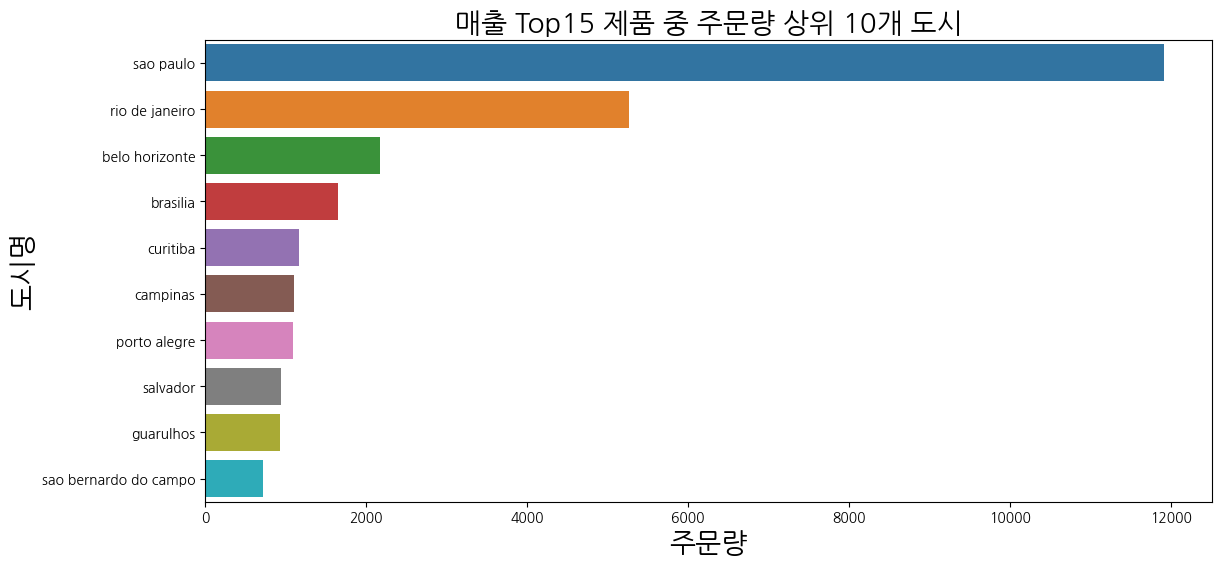

In [15]:
plt.figure(figsize=(13, 6))
sns.barplot(data=temp, x='order_id', y=temp.index).set_title("매출 Top15 제품 중 주문량 상위 10개 도시", fontsize=20)
plt.ylabel('도시명', fontsize=20)
plt.xlabel('주문량', fontsize=20)

## 지리 분석용 데이터 전처리

In [16]:
# 브라질 국경 밖의 위, 경도 제거 : 아웃라이어 제거
geo = geolocation[geolocation['geolocation_lat'] <= 5.27438888]
geo = geolocation[geolocation['geolocation_lng'] >= -73.98283055]
geo = geolocation[geolocation['geolocation_lat'] >= -33.75116944]
geo = geolocation[geolocation['geolocation_lng'] <=  -34.79314722]

In [17]:
# zip_code_prefix 자료형 => int 타입으로 변경
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_12636\441455635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)


In [18]:
geo_code = geo[['geolocation_zip_code_prefix']].apply(pd.value_counts).sum(1)
# sum(0)했을 때는 전체합계

In [19]:
geo = geo.assign(zip_code_count = geo['geolocation_zip_code_prefix'].map(geo_code)).drop_duplicates(['geolocation_zip_code_prefix'])
geo = geo.sort_values(by='zip_code_count', ascending = False)
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_count
470805,24220,-22.905817,-43.106989,niteroi,RJ,1146
470806,24230,-22.911270,-43.105151,niterói,RJ,1102
645450,38400,-18.915960,-48.278974,uberlandia,MG,965
594039,35500,-20.146615,-44.892592,divinopolis,MG,907
256708,11680,-23.431627,-45.077229,ubatuba,SP,879


### 주문 상품에 대한 데이터 Merge

In [20]:
# 구매자, 주문 데이터 inner join
df_customer_order = pd.merge(orders, customer, on = 'customer_id', how = 'inner')
# 판매자, 주문 상품 데이터 inner join
df_seller_item = pd.merge(order_items , olist_sellers, on='seller_id', how = 'inner')

df_customer_seller_prefix = pd.merge(df_customer_order, df_seller_item, on = 'order_id', how ='inner')

In [21]:
total = pd.merge(olist_products, df_customer_seller_prefix, on ='product_id', how='inner')
total = pd.merge(total, trans_name, on='product_category_name', how='inner')

In [22]:
total['product_category_name'] = total['product_category_name_english']

### 판매자, 구매자 지역 데이터 Merge

In [23]:
df_loc = total[['seller_zip_code_prefix','customer_zip_code_prefix']]
df_loc.shape

(111023, 2)

In [24]:
seller_customer_loc = pd.merge(df_loc, geo.rename(columns = {'geolocation_zip_code_prefix':'seller_zip_code_prefix'})
                               ,on = 'seller_zip_code_prefix', how='inner')

In [25]:
seller_customer_loc = seller_customer_loc.rename(columns = {
                            'geolocation_lat':'seller_lat',
                            'geolocation_lng':'seller_lng',
                            'geolocation_city':'seller_city',
                            'geolocation_state':'seller_state'
                            })
seller_customer_loc.shape

(110771, 7)

In [26]:
seller_customer_loc = pd.merge(seller_customer_loc, geo.rename(columns = {'geolocation_zip_code_prefix':'customer_zip_code_prefix'}) , on = 'customer_zip_code_prefix', how='inner')
seller_customer_loc = seller_customer_loc.rename(columns = {
                            'geolocation_lat':'customer_lat',
                            'geolocation_lng':'customer_lng',
                            'geolocation_city':'customer_city',
                            'geolocation_state':'customer_state'
                            })
seller_customer_loc.shape

(110475, 12)

## 지역간 거래수 비교

In [27]:
df1 = seller_customer_loc[['seller_city','customer_city']]
# 판매지역과 주문지역의 하나의 쌍 tuple 생성 
df1['seller_customer_pair'] = df1.apply(lambda x: (x['seller_city'], x['customer_city']), axis = 1)

# value_count 개수 저장 
seller_single = df1[['seller_city']].apply(pd.value_counts).sum(1)
customer_single = df1[['customer_city']].apply(pd.value_counts).sum(1)
# 주문지역별, 판매지역별 개수
df1 = df1.assign(seller_count = df1['seller_city'].map(seller_single))
df1 = df1.assign(customer_count = df1['seller_city'].map(customer_single))
df1['single_count'] = df1['seller_count'] + df1['customer_count']

pair = df1[['seller_customer_pair']].apply(pd.value_counts).sum(1)
df1 = df1.assign(pair_count = df1['seller_customer_pair'].map(pair))
df1.drop_duplicates('seller_customer_pair', inplace = True)
df1 = df1.reset_index(drop = True)

counts = 0
for i in range(df1.shape[0]):
    counts = counts + df1.loc[i,'pair_count']

df2 = df1.drop_duplicates('seller_city', inplace = False)
df2.sort_values(by = 'single_count', ascending= False, inplace = True)
df2 = df2.reset_index(drop = True)

print('the total number of orders ', counts)
print('the total number of distinct seller & customer_cities ', df2.shape[0])

x_axis = df2.loc[:9,'seller_city'].to_numpy()
y_axis = x_axis

# 히트맵을 그리기 위한 배열 
xy = [[0 for i in range(len(x_axis))] for i in range(len(x_axis))]
              
for i in range(df1.shape[0]):
    for ix in range(len(x_axis)):
        if(x_axis[ix] == df1.loc[i,'seller_city']):
            for iy in range(len(y_axis)):
                if(y_axis[iy] == df1.loc[i,'customer_city']):
                    xy[ix][iy] = df1.loc[i,'pair_count']


C:\Users\User\AppData\Local\Temp\ipykernel_12636\3350094269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['seller_customer_pair'] = df1.apply(lambda x: (x['seller_city'], x['customer_city']), axis = 1)
C:\Users\User\AppData\Local\Temp\ipykernel_12636\3350094269.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by = 'single_count', ascending= False, inplace = True)


the total number of orders  110475
the total number of distinct seller & customer_cities  588


c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 227 (\N{LATIN SMALL LETTER A WITH TILDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


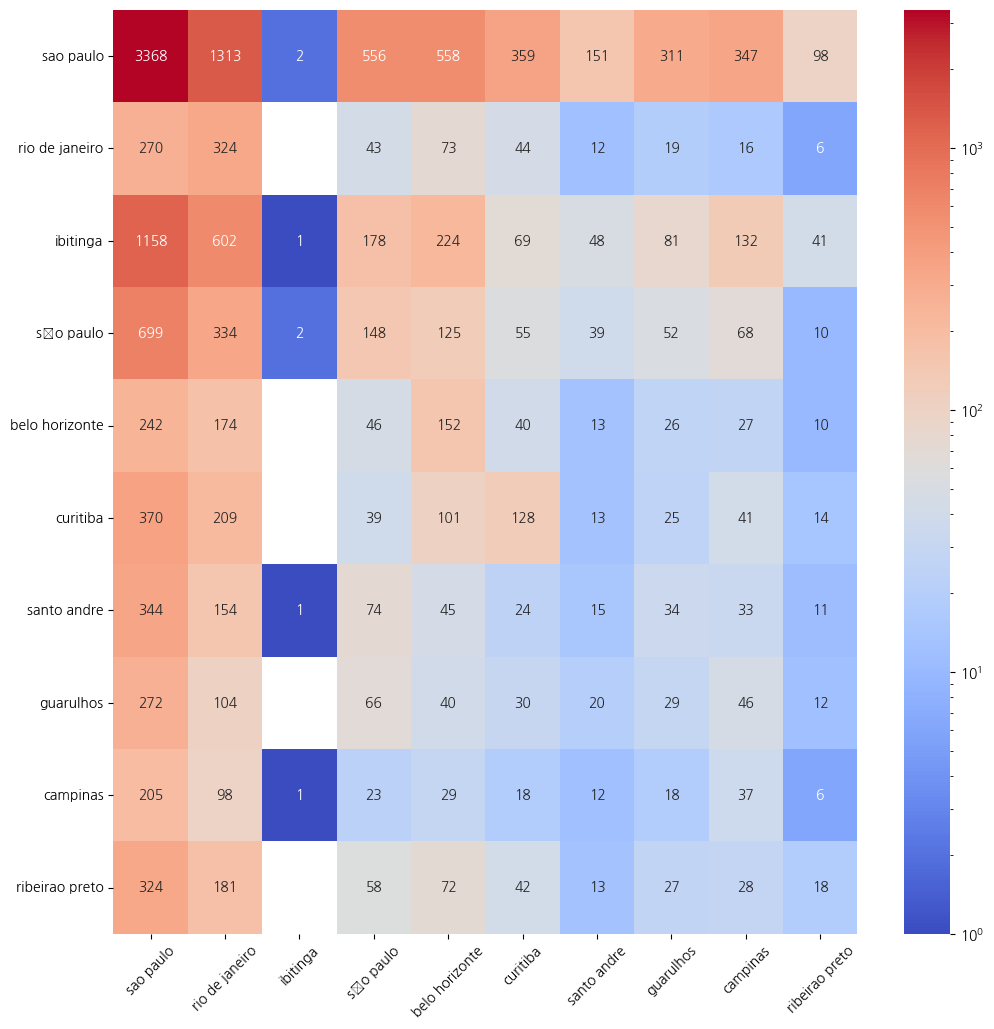

In [28]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize = (12,12))
ax = sns.heatmap(xy, cmap = 'coolwarm', annot = True, fmt='g', norm = LogNorm())
ax.set_xticklabels(x_axis, rotation = '45')
ax.set_yticklabels(y_axis, rotation = 'horizontal')
plt.show()

## 주문을 자주 받은 지역의 위치 시각화

In [29]:
# 고객 주문지 관련 정보 추출
customer_city = df_customer_order[["customer_city", "customer_zip_code_prefix"]]
customer_city = customer_city.rename(columns={'customer_zip_code_prefix':'geolocation_zip_code_prefix'})
customer_city

,customer_city,geolocation_zip_code_prefix
0,sao paulo,3149
1,barreiras,47813
2,vianopolis,75265
3,sao goncalo do amarante,59296
4,santo andre,9195
...,...,...
99436,sao jose dos campos,12209
99437,praia grande,11722
99438,nova vicosa,45920
99439,japuiba,28685


In [30]:
# 브라질 geo 데이터 
temp_geo = geo[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng", "geolocation_city"]]

# 코드 중복 제거
temp_geo = temp_geo.drop_duplicates('geolocation_zip_code_prefix')
temp_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
470805,24220,-22.905817,-43.106989,niteroi
470806,24230,-22.911270,-43.105151,niterói
645450,38400,-18.915960,-48.278974,uberlandia
594039,35500,-20.146615,-44.892592,divinopolis
256708,11680,-23.431627,-45.077229,ubatuba
...,...,...,...,...
748588,62948,-5.243330,-38.480560,morada nova
748483,62922,-5.083045,-37.911181,lagoinha
748454,62908,-4.995000,-38.003330,sao joao de deus
810091,76244,-15.897244,-52.233865,aragarças


In [31]:
# 고객 주문지 우편 번호와 geo 우편 번호 같은 것끼리 left join
temp = pd.merge(customer_city, temp_geo, on='geolocation_zip_code_prefix', how='left')

# 결측치 제거
temp = temp.dropna()

# 이름 변경
temp = temp.rename(columns={'geolocation_lat':'customer_lat', 'geolocation_lng':'customer_lng'})

# 지도 시각화에 필요한 데이터만 한정
temp = temp[['customer_city', 'customer_lat', 'customer_lng']]
temp

,customer_city,customer_lat,customer_lng
0,sao paulo,-23.574809,-46.587471
1,barreiras,-12.169860,-44.988369
2,vianopolis,-16.746337,-48.514624
3,sao goncalo do amarante,-5.767733,-35.275467
4,santo andre,-23.675037,-46.524784
...,...,...,...
99436,sao jose dos campos,-23.178732,-45.889711
99437,praia grande,-24.001467,-46.446355
99438,nova vicosa,-17.891522,-39.370942
99439,japuiba,-22.555985,-42.690761


In [32]:
from folium.plugins import HeatMap
import folium

loc = (-25.251692056240042, -45.21193216186583)
# 위도
latitude = loc[0]
# 경도
longitude = loc[1]

In [ ]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=4, 
               width=1200, 
               height=800
              )
              
coords = temp[['customer_lat', 'customer_lng']]


heatMap = HeatMap(temp[['customer_lat', 'customer_lng']],
                   min_opacity=0.1,
                   max_val=5,
                   radius=30, blur=15,
                   max_zoom=5, color='red')

heatMap.add_to(m)
m

해당 코드 결과물 : 용량 이슈로 캡쳐본 대체


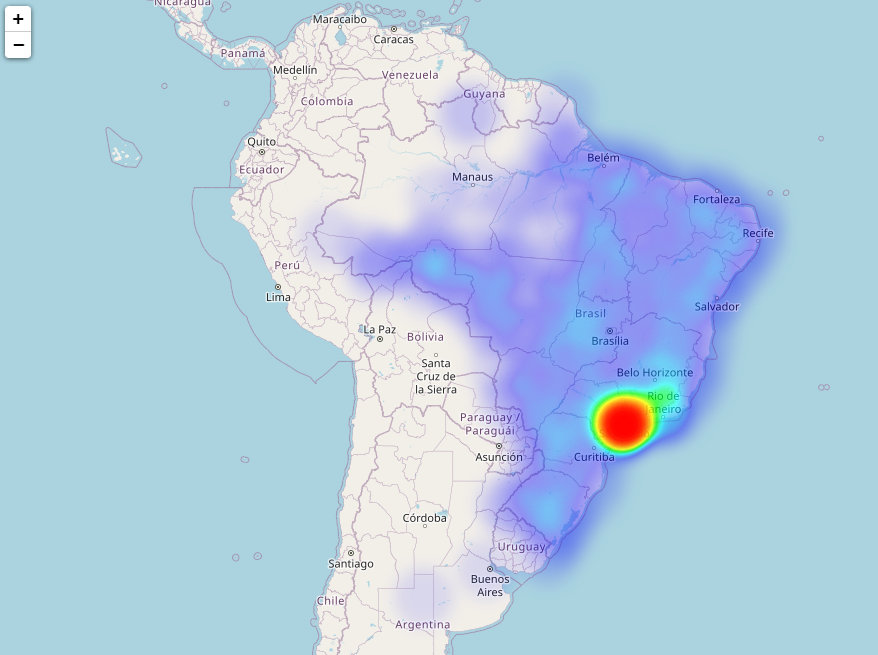

In [ ]:
from folium.plugins import MarkerCluster


m = folium.Map(
    location=[latitude, longitude],
    zoom_start=4,
)

coords = temp[['customer_lat', 'customer_lng']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['customer_lat'], coords['customer_lng']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

해당 코드 결과물

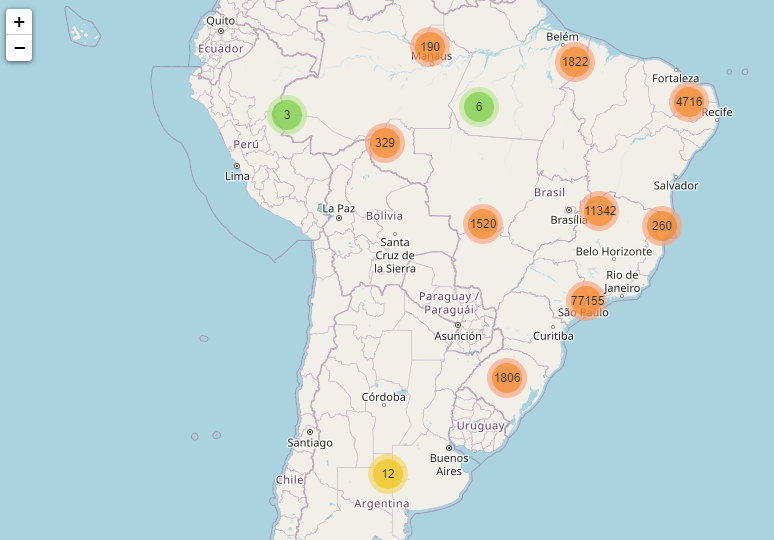

## 지역별 인기 품목

In [35]:
# 전체 매출
price_sum = df_all["price"].sum()
price_sum

14076188.759999998

In [36]:
# 카테고리 기준 가격 합계 그룹화
# 가격 기준 내림차순 정렬
sale_rank = df_all.groupby("product_category_name_english").agg({"price":"sum"}).sort_values("price", ascending=False)
sale_rank

,price
product_category_name_english,
health_beauty,1301947.97
watches_gifts,1254322.95
bed_bath_table,1107249.09
sports_leisure,1029603.88
computers_accessories,950053.69
...,...
flowers,1110.04
home_comfort_2,773.17
cds_dvds_musicals,730.00


In [37]:
# 매출의 약 80%가 top15에서 발생하는 것 확인
top15 = sale_rank.head(15)
top15

,price
product_category_name_english,
health_beauty,1301947.97
watches_gifts,1254322.95
bed_bath_table,1107249.09
sports_leisure,1029603.88
computers_accessories,950053.69
furniture_decor,772096.17
housewares,668880.94
cool_stuff,664637.13
auto,618395.50


In [38]:
list(top15.index)

['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor',
 'housewares',
 'cool_stuff',
 'auto',
 'garden_tools',
 'toys',
 'baby',
 'perfumery',
 'telephony',
 'office_furniture']

In [39]:
# 고객 도시 기준 주문량 그룹화
# 주문량 기준 내림차순 정렬 후 top10 한정
df_all.groupby("customer_city").agg({"order_id":"count"}).sort_values("order_id", ascending=False).head(10).index

Index(['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba',
       'campinas', 'porto alegre', 'salvador', 'guarulhos',
       'sao bernardo do campo'],
      dtype='object', name='customer_city')

In [40]:
city10_l = [
    'sao paulo', 
    'rio de janeiro', 
    'belo horizonte', 
    'brasilia', 
    'curitiba', 
    'campinas',
    'porto alegre', 
    'salvador', 
    'guarulhos', 
    'sao bernardo do campo'
    ]

In [41]:
# 도시 주문량 top10 한정
# 품목 매출 합계 top5 한정 
# 모두 확인하면 너무 난잡하여 한정

# 조건 : (카테고리가 제품 top5에 있고) & (고객 도시가 도시 top10에 있으면) == True
condition = (df_all["product_category_name_english"].map(lambda x: True if x in list(top15.index[:5]) else False)) & (df_all["customer_city"].map(lambda x: True if x in city10_l else False))

# 조건에 맞는 데이터 추출
city10 = df_all.loc[condition, :]

# 제품 5개, 도시 10개가 잘 추출되었는지 개수로 확인
print(city10["product_category_name_english"].nunique(), city10["customer_city"].nunique())

# 데이터 확인
city10

5 10


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
14584,81c277d38bfc8beca560a53fac3646f5,1748b9f945e5b64b45417d766da4e07f,delivered,2017-09-11 21:36:12,2017-09-11 21:50:14,2017-09-13 15:07:39,2017-09-14 18:32:30,2017-09-21 00:00:00,1.0,6a33f85f66191cc5b645b5f775ca93d9,...,4.0,400.0,16.0,6.0,11.0,1c707591f8e9763d709df72835e6ba2d,2415,sao paulo,SP,sports_leisure
14585,b095ec7b830d94cc7e1b67fed0455c01,85051f9b3e9909676bf77f69a2c05b20,delivered,2017-09-20 11:49:49,2017-09-20 12:04:41,2017-09-21 16:59:21,2017-09-22 16:37:34,2017-10-05 00:00:00,1.0,6a33f85f66191cc5b645b5f775ca93d9,...,4.0,400.0,16.0,6.0,11.0,dd17d7c53c87783e0f71685dec93b9f3,4011,sao paulo,SP,sports_leisure
14586,fd732412d4727a9a7e0d6231b2ca11ed,1a84d26e0b91518f76c51b59bb3e9408,delivered,2017-08-19 19:25:41,2017-08-19 19:44:26,2017-08-21 16:26:59,2017-08-31 20:18:12,2017-09-21 00:00:00,1.0,afa3a51dec198b1d14a0c19849dab3a8,...,4.0,400.0,16.0,6.0,20.0,118be57d1b7de439453a0c6625ad7934,41815,salvador,BA,sports_leisure
14601,466fa6875c92ccd8425b0a91a8d1a771,7ff0e2983908917cbd12217e27b6dfdb,delivered,2018-06-24 23:18:24,2018-06-24 23:34:12,2018-07-05 09:40:00,2018-07-09 12:24:41,2018-07-23 00:00:00,1.0,dfe123265435bbc08b40fc418f66d9a3,...,1.0,15467.0,64.0,62.0,25.0,490a34b91aaacdd0e54f2c8640c396b1,5171,sao paulo,SP,sports_leisure
14602,466fa6875c92ccd8425b0a91a8d1a771,7ff0e2983908917cbd12217e27b6dfdb,delivered,2018-06-24 23:18:24,2018-06-24 23:34:12,2018-07-05 09:40:00,2018-07-09 12:24:41,2018-07-23 00:00:00,2.0,dfe123265435bbc08b40fc418f66d9a3,...,1.0,15467.0,64.0,62.0,25.0,490a34b91aaacdd0e54f2c8640c396b1,5171,sao paulo,SP,sports_leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95425,efb26ebfb1e2ef4c7cc691d05bae1e2e,f6978bd4f963e719065c053b7cea7aca,delivered,2018-01-02 11:39:42,2018-01-04 05:10:15,2018-01-12 22:53:04,2018-01-15 21:09:20,2018-01-26 00:00:00,1.0,628677036f276f6c0792cded8e9211ee,...,1.0,1300.0,40.0,40.0,40.0,c3fd468e781ba344415ee191377bbb96,9820,sao bernardo do campo,SP,bed_bath_table
95426,4174ab02f93138dbcae799299d390233,d15fcd763b3fe576eeff22682ba06302,delivered,2018-05-02 12:17:02,2018-05-02 12:33:45,2018-05-22 10:34:00,2018-05-24 16:22:30,2018-05-15 00:00:00,1.0,628677036f276f6c0792cded8e9211ee,...,1.0,1300.0,40.0,40.0,40.0,8e5f377492eae6dbd257b1d4f099683e,13020,campinas,SP,bed_bath_table
95434,db611886b9ea2c770628eebc6617b498,e3036be0afef4dc58d7d95e737ffde01,delivered,2018-06-02 13:29:22,2018-06-02 13:50:03,2018-06-07 11:23:00,2018-06-13 16:28:44,2018-07-17 00:00:00,1.0,49026f19cf3e18f394328d81cba27708,...,2.0,200.0,49.0,10.0,40.0,87a6af9cd74c6568bc6b6900d25460df,31270,belo horizonte,MG,bed_bath_table
95435,0ec61157a488963fe217233f74c52760,01415cfeb907d8ce0e17075b4c097fe9,delivered,2016-10-09 23:50:37,2016-10-10 11:04:05,2016-10-25 13:55:42,2016-10-31 11:54:44,2016-12-02 00:00:00,1.0,895fc53d66ecb6c1afc40138dbc2a73c,...,3.0,600.0,41.0,14.0,14.0,c2154b6ca788852f644e6f56dc7abbe9,5409,sao paulo,SP,bed_bath_table


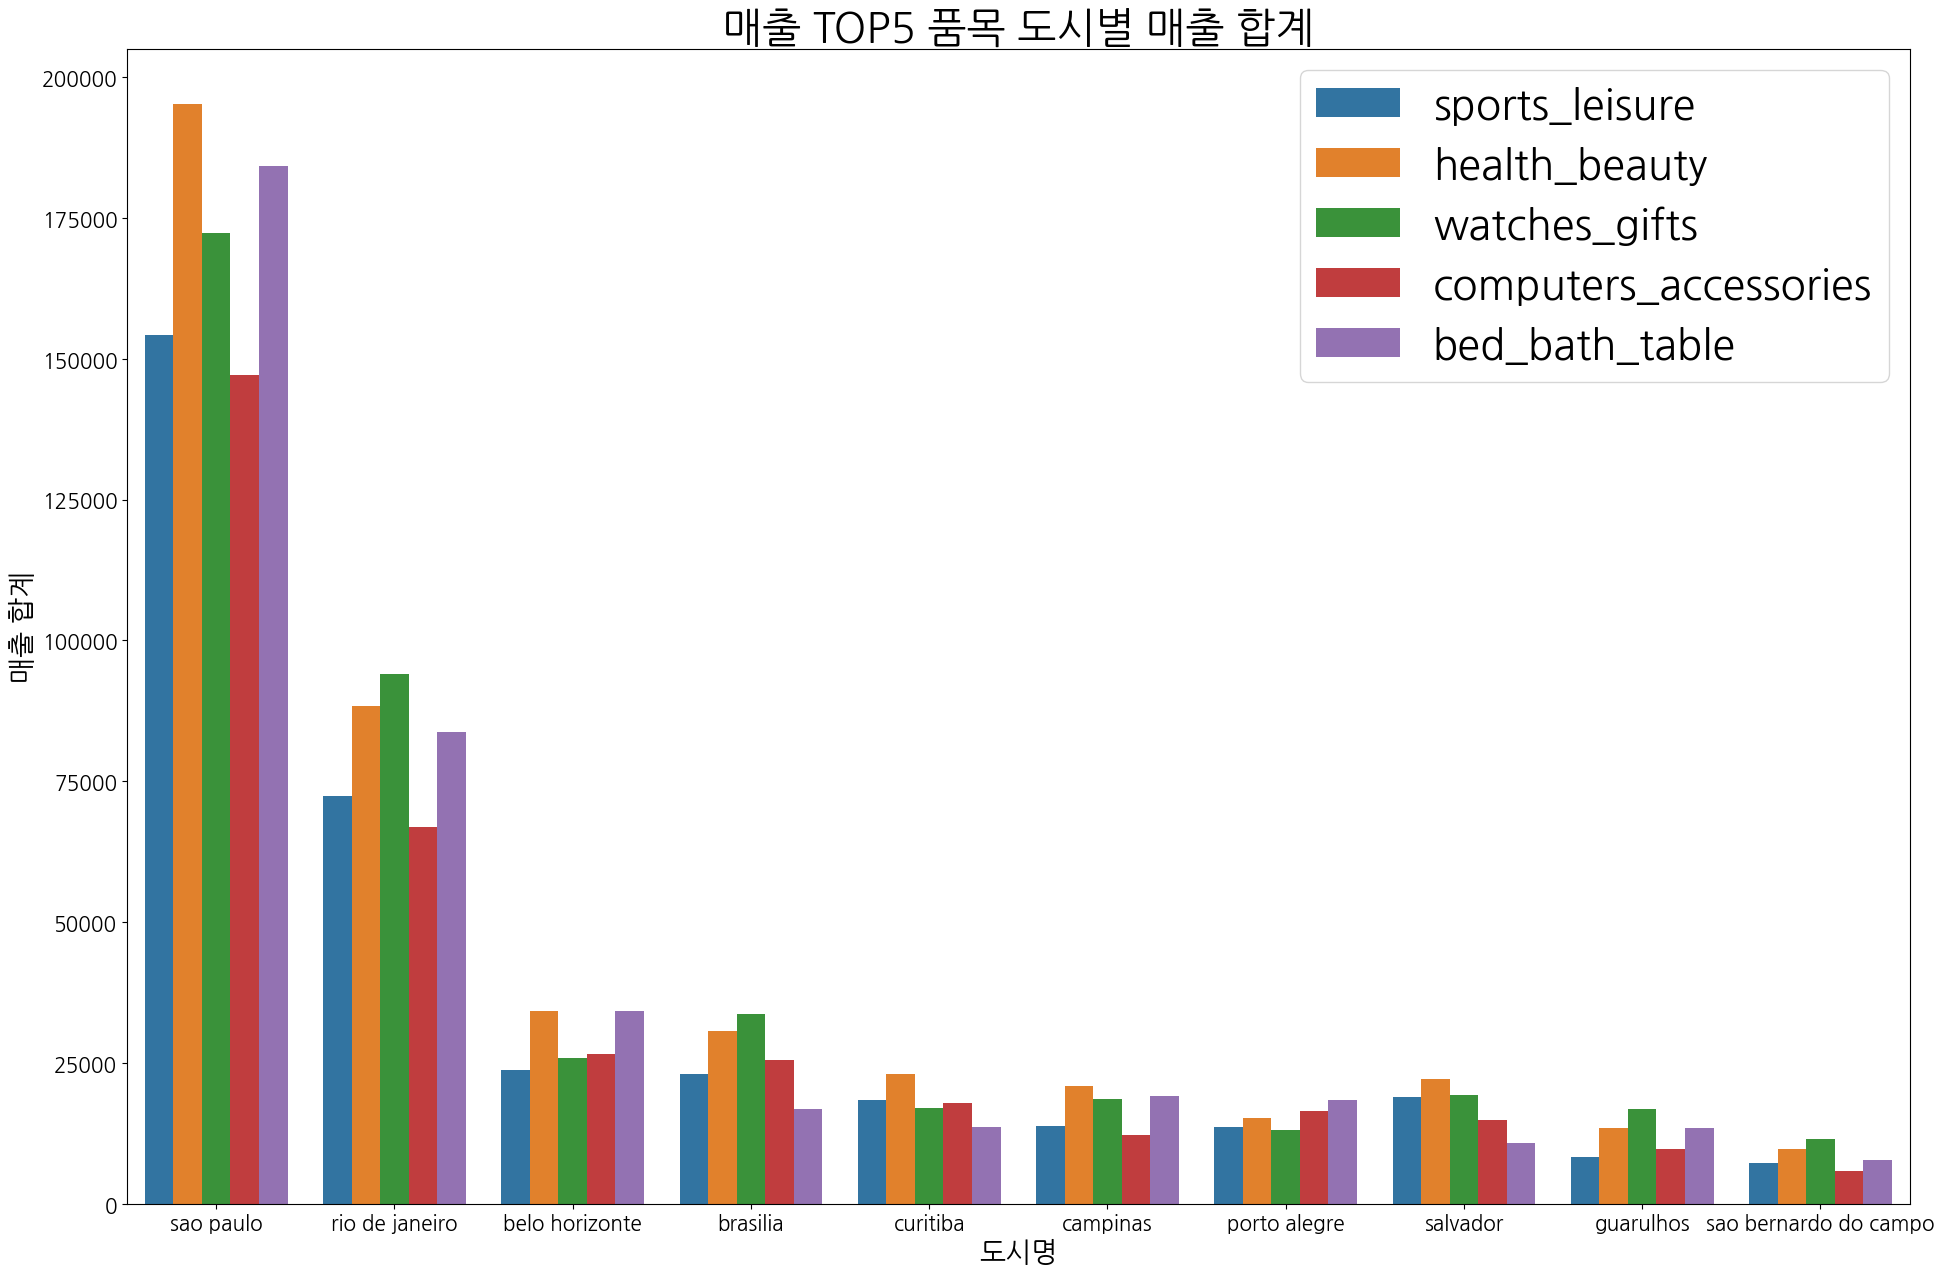

In [44]:
plt.figure(figsize=(23, 15))
sns.barplot(data=city10, x="customer_city", y="price", order=city10_l, ci=None, 
            estimator=sum, hue="product_category_name_english").set_title("매출 TOP5 품목 도시별 매출 합계", fontsize=30)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.xlabel('도시명', fontsize=20)
plt.ylabel('매출 합계', fontsize=20)
plt.legend(fontsize=30)

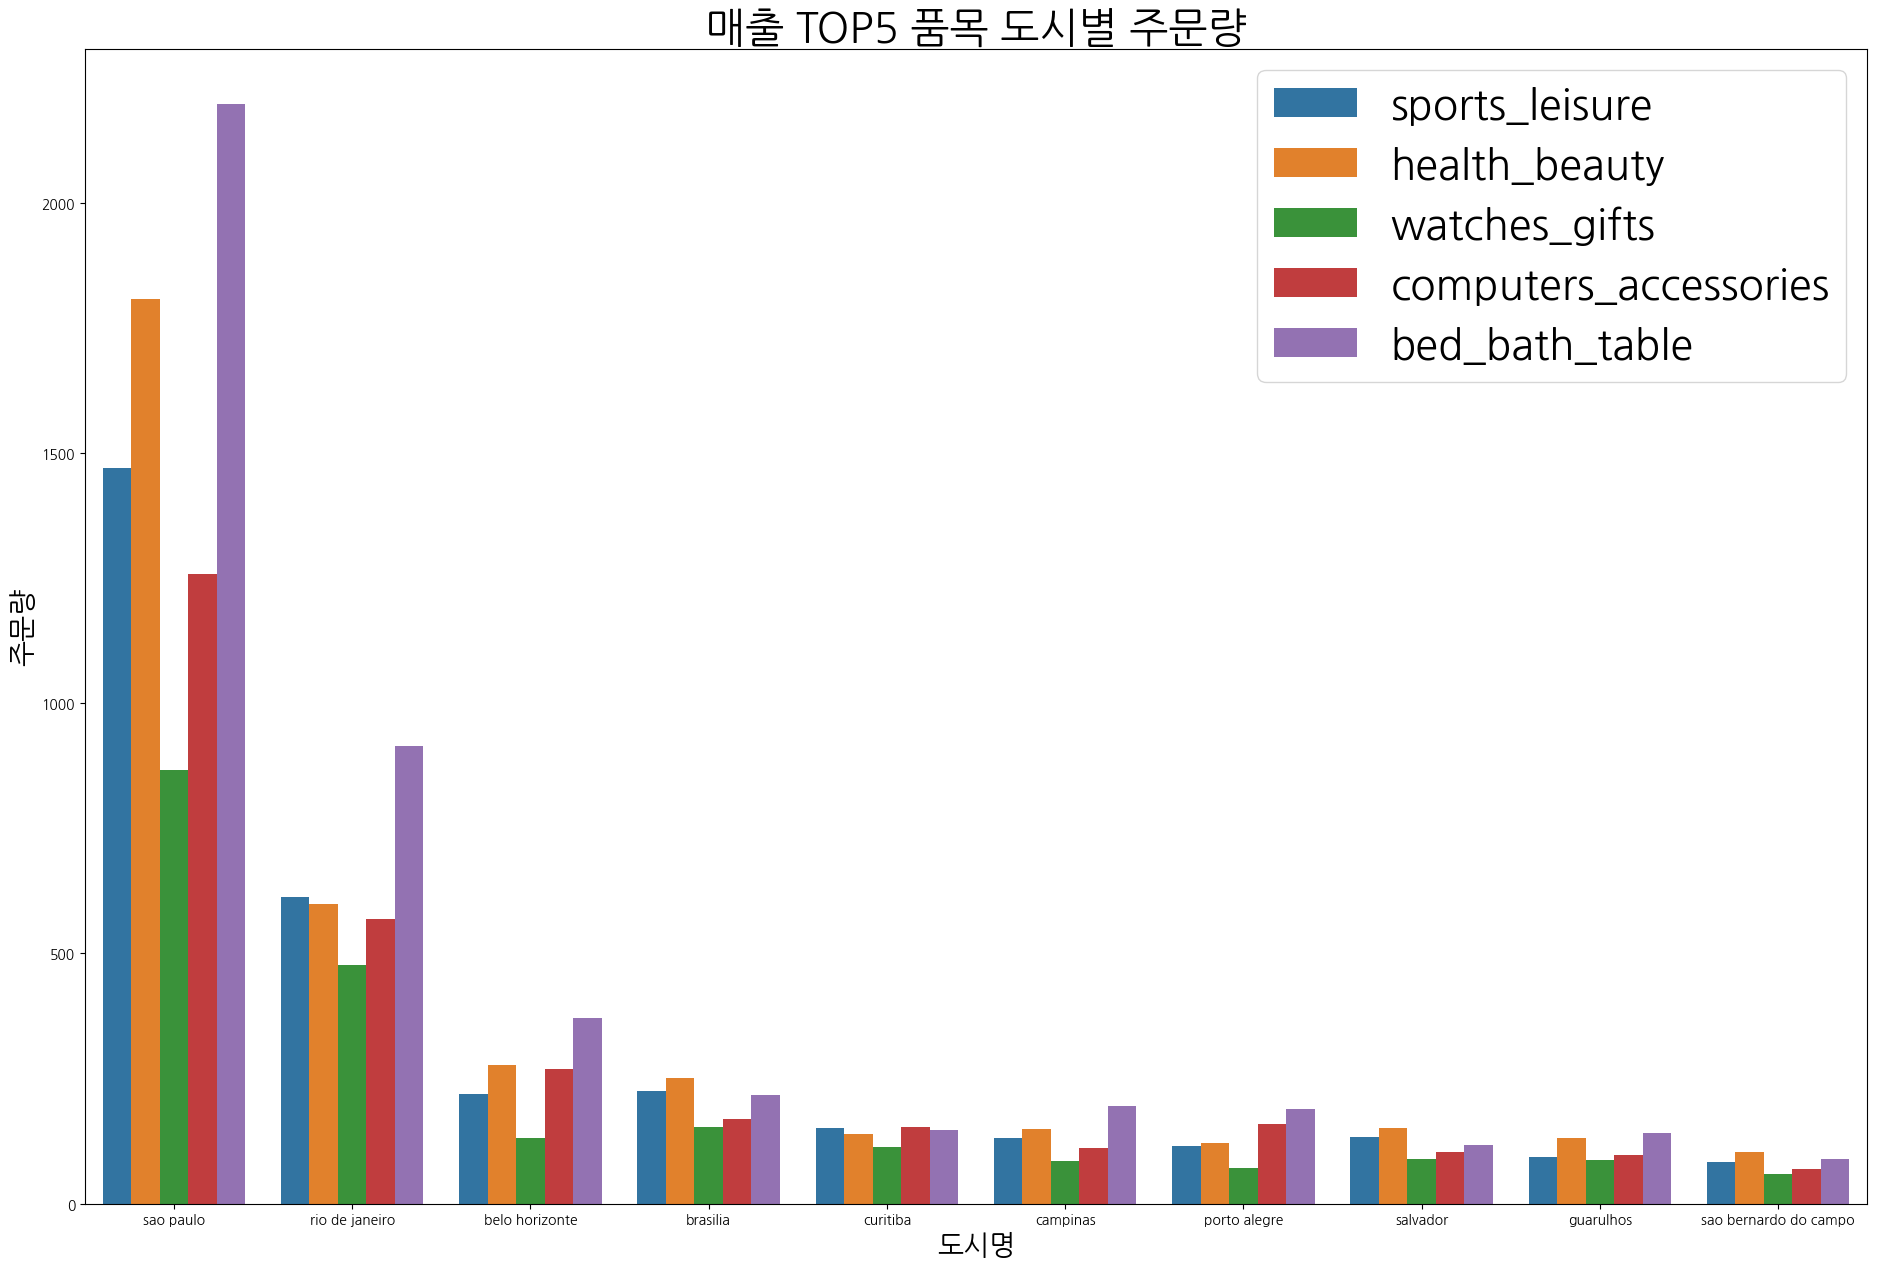

In [43]:
plt.figure(figsize=(23, 15))
sns.barplot(data=city10, x="customer_city", y="price", order=city10_l, estimator=len,
            hue="product_category_name_english", ci=None).set_title("매출 TOP5 품목 도시별 주문량", fontsize=30)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.xlabel('도시명', fontsize=20)
plt.ylabel('주문량', fontsize=20)
plt.legend(fontsize=30)

## 거리

### 위 경도 좌표 사이 거리 구하기
- 위도와 경도 선 사이의 거리가 있기 때문에 지리학에는 적용되지 않는다.   
- 적도에 가까워 질수록 위도선은 더 멀어진다. 
- 지구의 곡률을 고려하여 거리를 측정해야한다.
- Preprocessing 노트북 참고

- haversine distance
  
  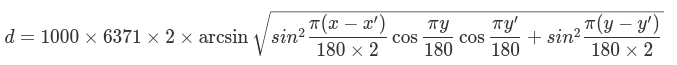

In [45]:
from math import radians , cos, sin, asin, sqrt 
from tqdm import tqdm
def geo_dist(x1, y1, x2, y2 ):
    x1, y1, x2, y2 = map(radians , [x1,y1,x2,y2])
    d_lng = x2 - x1
    d_lat = y2 - y1
    a = sin(d_lat/2)**2 + cos(y1) * cos(y2) * sin(d_lng/2)**2
    dist = round((2*asin(sqrt(a))*6371*1000)/1000,3)
    return dist 


A = seller_customer_loc['seller_lng']
B = seller_customer_loc['seller_lat']
C = seller_customer_loc['customer_lng']
D = seller_customer_loc['customer_lat']
seller_customer_loc['dist']  = seller_customer_loc['seller_lat']
for idx, v in tqdm(enumerate(zip(A,B,C,D))):
    seller_customer_loc['dist'].loc[idx] = geo_dist(*v)
seller_customer_loc

0it [00:00, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_12636\1771627049.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_customer_loc['dist'].loc[idx] = geo_dist(*v)
110475it [01:05, 1679.99it/s]


,seller_zip_code_prefix,customer_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state,zip_code_count_x,customer_lat,customer_lng,customer_city,customer_state,zip_code_count_y,dist
0,3694,13848,-23.537922,-46.477696,sao paulo,SP,112,-22.331249,-46.922580,mogi guaçu,SP,194,141.699
1,22230,13848,-22.937816,-43.176199,rio de janeiro,RJ,420,-22.331249,-46.922580,mogi guaçu,SP,194,390.351
2,5849,13848,-23.651115,-46.755211,sao paulo,SP,88,-22.331249,-46.922580,mogi guaçu,SP,194,147.759
3,14050,13848,-21.171217,-47.819418,ribeirao preto,SP,169,-22.331249,-46.922580,mogi guaçu,SP,194,158.799
4,35570,13848,-20.474084,-45.424321,formiga,MG,445,-22.331249,-46.922580,mogi guaçu,SP,194,258.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110470,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110471,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110472,74560,85794,-16.663544,-49.272649,goiânia,GO,31,-22.896712,-51.890841,alto alegre do iguacu,PR,4,745.204
110473,74560,13302,-16.663544,-49.272649,goiânia,GO,31,-23.264240,-47.273847,itu,SP,9,763.069


<AxesSubplot:xlabel='dist', ylabel='Count'>

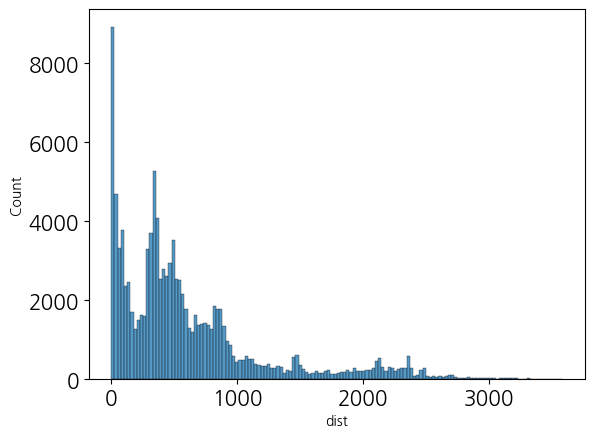

In [46]:
sns.histplot(seller_customer_loc.dist)

### 배송기간에 따른 주문량

In [47]:
top15_df[["order_purchase_timestamp", 'order_estimated_delivery_date']]

,order_purchase_timestamp,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-18 00:00:00
1,2017-10-02 10:56:33,2017-10-18 00:00:00
2,2017-10-02 10:56:33,2017-10-18 00:00:00
3,2017-08-15 18:29:31,2017-08-28 00:00:00
4,2017-08-02 18:24:47,2017-08-15 00:00:00
...,...,...
104528,2017-03-08 10:44:37,2017-04-05 00:00:00
104529,2017-03-08 10:44:37,2017-04-05 00:00:00
104530,2017-03-08 10:44:37,2017-04-05 00:00:00
104531,2017-02-14 14:28:17,2017-03-15 00:00:00


In [48]:
# 구매 날짜, 배송 도착 예상 날짜 datetime으로 변경
top15_df['order_purchase_timestamp'] = pd.to_datetime(top15_df["order_purchase_timestamp"])
top15_df['order_estimated_delivery_date'] = pd.to_datetime(top15_df["order_estimated_delivery_date"])

# 데이터 출력
top15_df[["order_purchase_timestamp", 'order_estimated_delivery_date']]

C:\Users\User\AppData\Local\Temp\ipykernel_12636\901407418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_df['order_purchase_timestamp'] = pd.to_datetime(top15_df["order_purchase_timestamp"])
C:\Users\User\AppData\Local\Temp\ipykernel_12636\901407418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_df['order_estimated_delivery_date'] = pd.to_datetime(top15_df["order_estimated_delivery_date"])


,order_purchase_timestamp,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-18
1,2017-10-02 10:56:33,2017-10-18
2,2017-10-02 10:56:33,2017-10-18
3,2017-08-15 18:29:31,2017-08-28
4,2017-08-02 18:24:47,2017-08-15
...,...,...
104528,2017-03-08 10:44:37,2017-04-05
104529,2017-03-08 10:44:37,2017-04-05
104530,2017-03-08 10:44:37,2017-04-05
104531,2017-02-14 14:28:17,2017-03-15


In [49]:
# 배송 기간 = 배송 도착 예상 날짜 - 구매 날짜
top15_df["deliver_day"] = top15_df['order_estimated_delivery_date'] - top15_df['order_purchase_timestamp']
top15_df["deliver_day"]

C:\Users\User\AppData\Local\Temp\ipykernel_12636\1591667329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_df["deliver_day"] = top15_df['order_estimated_delivery_date'] - top15_df['order_purchase_timestamp']


0        15 days 13:03:27
1        15 days 13:03:27
2        15 days 13:03:27
3        12 days 05:30:29
4        12 days 05:35:13
               ...       
104528   27 days 13:15:23
104529   27 days 13:15:23
104530   27 days 13:15:23
104531   28 days 09:31:43
104532   28 days 09:31:43
Name: deliver_day, Length: 92176, dtype: timedelta64[ns]

In [50]:
# 날짜 차이만 추출하기
# 문자 타입으로 변경
top15_df["deliver_day"] = top15_df["deliver_day"].astype("str")

# splited list = [45, days, 02:44:41]
top15_df["deliver_day"] = top15_df["deliver_day"].map(lambda x: int(x.split()[0]))
top15_df["deliver_day"]

C:\Users\User\AppData\Local\Temp\ipykernel_12636\3076029835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_df["deliver_day"] = top15_df["deliver_day"].astype("str")
C:\Users\User\AppData\Local\Temp\ipykernel_12636\3076029835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_df["deliver_day"] = top15_df["deliver_day"].map(lambda x: int(x.split()[0]))


0         15
1         15
2         15
3         12
4         12
          ..
104528    27
104529    27
104530    27
104531    28
104532    28
Name: deliver_day, Length: 92176, dtype: int64

In [51]:
# 소요기간 : 개수
deliver_day_cnt_dict = dict(top15_df["deliver_day"].value_counts())
deliver_day_cnt_dict

{21: 5616,
 22: 5232,
 23: 5139,
 24: 4918,
 20: 4538,
 25: 4491,
 19: 4458,
 26: 4248,
 27: 3845,
 28: 3537,
 18: 3321,
 17: 2946,
 29: 2754,
 30: 2725,
 16: 2656,
 12: 2390,
 15: 2353,
 13: 2338,
 31: 2274,
 32: 2265,
 33: 1932,
 14: 1840,
 34: 1714,
 11: 1561,
 35: 1271,
 9: 1096,
 10: 1092,
 36: 1045,
 37: 836,
 38: 765,
 7: 725,
 39: 627,
 8: 617,
 40: 576,
 41: 443,
 42: 385,
 43: 305,
 4: 269,
 5: 253,
 6: 252,
 44: 240,
 45: 238,
 46: 198,
 2: 169,
 48: 164,
 47: 142,
 54: 138,
 50: 138,
 52: 136,
 49: 136,
 3: 113,
 51: 102,
 55: 72,
 56: 66,
 58: 61,
 53: 59,
 61: 42,
 57: 42,
 60: 32,
 62: 29,
 64: 23,
 66: 23,
 59: 22,
 65: 18,
 63: 16,
 68: 11,
 67: 10,
 72: 8,
 69: 8,
 71: 7,
 70: 6,
 74: 5,
 89: 4,
 81: 4,
 73: 4,
 96: 3,
 83: 3,
 94: 3,
 78: 3,
 144: 2,
 79: 2,
 109: 2,
 86: 2,
 90: 2,
 140: 2,
 149: 2,
 82: 2,
 84: 2,
 92: 1,
 95: 1,
 87: 1,
 76: 1,
 99: 1,
 88: 1,
 101: 1,
 91: 1,
 142: 1,
 97: 1,
 155: 1,
 106: 1}

In [52]:
# 75일 이상 걸리는 배송은 이상치로 판단하고 시각화 X
condition = top15_df["deliver_day"] < 75
temp = top15_df.loc[condition, :]
temp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,deliver_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,15
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,15
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,15
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,housewares,12
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,housewares,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104528,0689012a897b2ac50b37994d77898bc8,c2676f47437c3ea66442e39a07605d77,processing,2017-03-08 10:44:37,2017-03-08 10:55:21,NaN,NaN,2017-04-05,1.0,a0265e3673ba47db572b54978126f6ae,...,15000.0,50.0,90.0,50.0,8ad37a8e909b633be54a0dc3e94c7a04,86600,rolandia,PR,office_furniture,27
104529,0689012a897b2ac50b37994d77898bc8,c2676f47437c3ea66442e39a07605d77,processing,2017-03-08 10:44:37,2017-03-08 10:55:21,NaN,NaN,2017-04-05,2.0,a0265e3673ba47db572b54978126f6ae,...,15000.0,50.0,90.0,50.0,8ad37a8e909b633be54a0dc3e94c7a04,86600,rolandia,PR,office_furniture,27
104530,0689012a897b2ac50b37994d77898bc8,c2676f47437c3ea66442e39a07605d77,processing,2017-03-08 10:44:37,2017-03-08 10:55:21,NaN,NaN,2017-04-05,3.0,a0265e3673ba47db572b54978126f6ae,...,15000.0,50.0,90.0,50.0,8ad37a8e909b633be54a0dc3e94c7a04,86600,rolandia,PR,office_furniture,27
104531,9c781d427857ca8dee49b22614eb9e39,4396492d7da56955ab6c0fc9c9fceaab,processing,2017-02-14 14:28:17,2017-02-14 14:35:24,NaN,NaN,2017-03-15,1.0,61d980017b9f55ac2451dbf0bdb849f2,...,50.0,35.0,90.0,45.0,a4585eb1763f581eae8562642424a638,88162,biguacu,SC,office_furniture,28


Text(0, 0.5, '주문량')

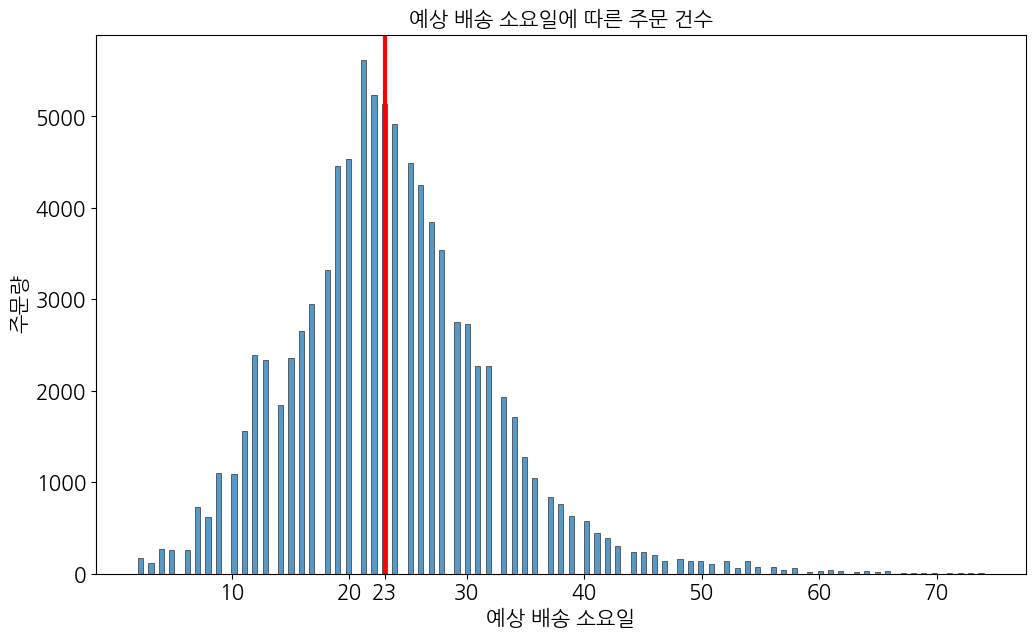

In [53]:
plt.figure(figsize=(12, 7))
sns.histplot(data=temp["deliver_day"]).set_title('예상 배송 소요일에 따른 주문 건수', fontsize=15)
plt.xticks([10, 20, 23, 30, 40, 50, 60, 70])
plt.axvline(23, color='r', linewidth=3, visible=True)
plt.xlabel('예상 배송 소요일', fontsize=15)
plt.ylabel('주문량', fontsize=15)

In [54]:
temp["order_delivered_customer_date"] = pd.to_datetime(temp["order_delivered_customer_date"])

C:\Users\User\AppData\Local\Temp\ipykernel_12636\3159423594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["order_delivered_customer_date"] = pd.to_datetime(temp["order_delivered_customer_date"])


In [55]:
# 배송기간 = 실제 배송일 - 주문일
temp["date_diff"] = temp["order_delivered_customer_date"] - temp["order_purchase_timestamp"]
temp["date_diff"] = temp["date_diff"].astype('str')
temp["date_diff"] = temp["date_diff"].map(lambda x: x.split()[0])

# 데이터 출력
temp[["order_delivered_customer_date", "order_purchase_timestamp", "date_diff"]]

C:\Users\User\AppData\Local\Temp\ipykernel_12636\4224716846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["date_diff"] = temp["order_delivered_customer_date"] - temp["order_purchase_timestamp"]
C:\Users\User\AppData\Local\Temp\ipykernel_12636\4224716846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["date_diff"] = temp["date_diff"].astype('str')
C:\Users\User\AppData\Local\Temp\ipykernel_12636\4224716846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,order_delivered_customer_date,order_purchase_timestamp,date_diff
0,2017-10-10 21:25:13,2017-10-02 10:56:33,8
1,2017-10-10 21:25:13,2017-10-02 10:56:33,8
2,2017-10-10 21:25:13,2017-10-02 10:56:33,8
3,2017-08-18 14:44:43,2017-08-15 18:29:31,2
4,2017-08-07 18:30:01,2017-08-02 18:24:47,5
...,...,...,...
104528,NaT,2017-03-08 10:44:37,NaT
104529,NaT,2017-03-08 10:44:37,NaT
104530,NaT,2017-03-08 10:44:37,NaT
104531,NaT,2017-02-14 14:28:17,NaT


In [56]:
# 배송기간이 결측치가 아닌 데이터만 추출
condition = temp["date_diff"] != "NaT"
temp = temp.loc[condition, :]

# object 타입을 int 타입으로 변경 
temp["date_diff"] = temp["date_diff"].astype('int')
temp.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_12636\364273699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["date_diff"] = temp["date_diff"].astype('int')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,deliver_day,date_diff
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,15,8
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,15,8


In [57]:
temp["date_diff"].describe()

count    90146.000000
mean        12.134271
std          9.549957
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: date_diff, dtype: float64

<AxesSubplot:xlabel='date_diff'>

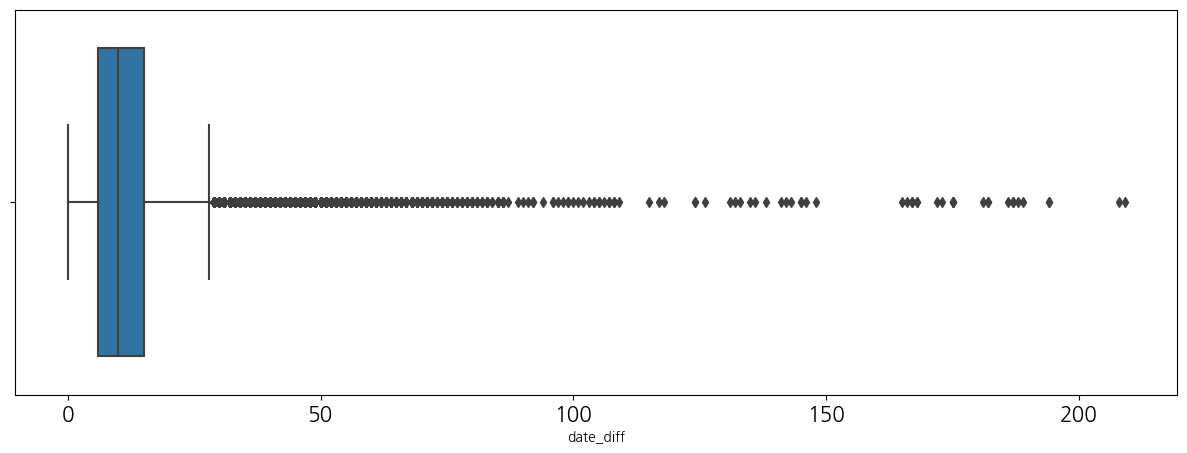

In [58]:
# 배송기간 boxplot
plt.figure(figsize=(15,5))
sns.boxplot(data=temp, x="date_diff")

Text(0, 0.5, '주문량')

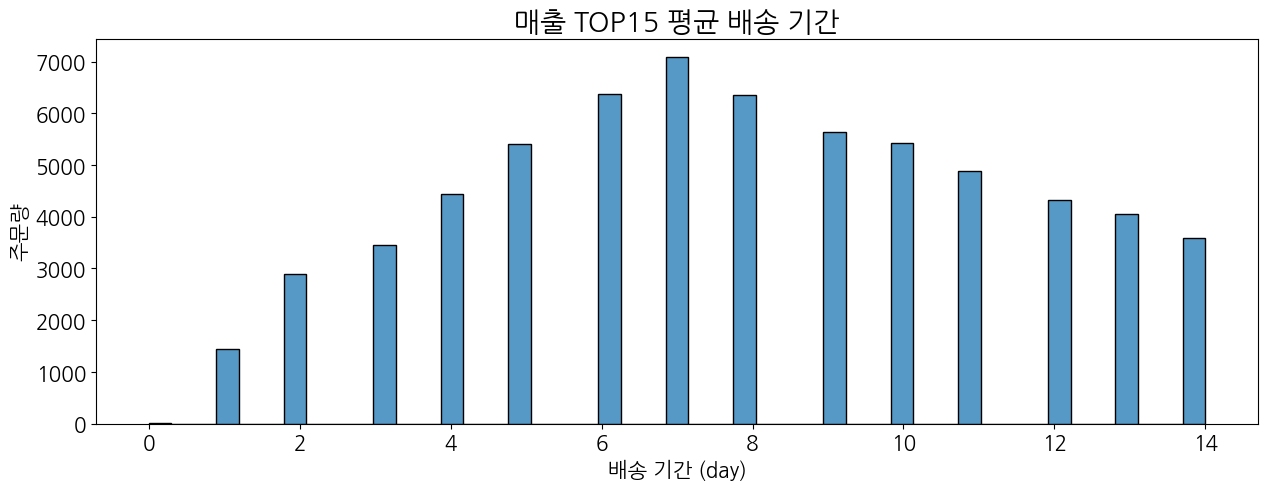

In [59]:
# 3분위 수 이상은 이상치로 보고 제거
condition = temp["date_diff"] < temp["date_diff"].describe()["75%"]
temp = temp.loc[condition, :]

plt.figure(figsize=(15,5))
sns.histplot(data=temp, x="date_diff").set_title("매출 TOP15 평균 배송 기간", fontsize="20")
plt.xlabel('배송 기간 (day)', fontsize=15)
plt.ylabel('주문량', fontsize=15)